# INFO 2950 Final Project - Phase II

## Research Questions:
Question: Can we reliably predict a state's CO2 emissions based of of their population, income, prison population, and  other variables?

In this assignment we would like to see if there is a correlation between population and CO2 emmission rates, population and prision population, population and average annual income, average annual income and CO2 emmision rates, average annual income and prision population, and CO2 emmisions and prision populations. We will train a multivariable regression to see if we can reliably predict a state's CO2 emissions based off of population, income, prison population, and possibly other variables.

Originally our research was centered around predicting population based on multiple variables, however as we went and found more data we started thinking about how all of the variables we were looking up would affect the planet. This led us to searching for datasets regarding CO2. We were inspired by the data we had already collected to pivot our resesrch question to be about how population, income, and prison population would affect CO2 levels per state.

### Discussion Notes:
- Focus of research question is very specific? Why is this research question significant? 
- Where is the intentionally and can we follow your thought process? 

## Data Descriptions:
We originally collected 5 data tables for this phase. There were originally two population data tables. The first contains the years 1984 to 2009. The second contains the years 2010-2018. These data tables were combined to then give us four working data tables. These data tables are Population, Average Annual Income, CO2 Emmisions, and Prison Populations. The Population data table shows the population of the United States of America by state from the years 1984 to 2018. The Average Annual Income data table shows the average annual income rates per state in the United States of America from the years 1984 to 2018. This is measured in U.S Dollars and scaled for inflation to reflect dollar amounts in 2022. The CO2 Emmisions data table shows the total state energy related carbon emmissions from 1984-2018. The unit of measurement is million metric tons of energy-related carbon dioxide.

Source for Population DataFrame 1984-2009: https://www.icip.iastate.edu/tables/population/states-estimates

Source for Population DataFrame 2010-2018: https://www.census.gov/programs-surveys/popest/technical-documentation/research/evaluation-estimates/2020-evaluation-estimates/2010s-state-total.html

Source for Average Annual Income DataFrame: https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html

Source for CO2 Emmissions DataFrame: https://www.eia.gov/environment/emissions/state/

Source for Prision Population DataFrame: https://www.prisonpolicy.org/reports/jailsovertime_table_5.html

## Discussion Notes
- No questions from article (self-contained, data collection) were answered. 

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import duckdb, sqlalchemy

In [ ]:
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


## Data Cleaning:

The original income data sheet came in an excel sheet format, the very first step was to delete irrelevant rows and columns, then convert it to a csv.

The original data sheet came with the standard income in 2022 U.S. dollars and 2018 U.S. dollars. There were techincally two separate charts all showing the same data, so we removed the section showing 2018 dollars. After removing this section, only the data for all 50 states (plus DC and the US) in 2022 U.S. dollars remained.

We then deleted the title and introductory information that was included in the data sheet. This information is saved elsewhere to give proper credit to the creator, and is not relevant for the analyses we will do.

In the dataset, there were duplicate columns for 2017 and 2013, which were deleted.

Certain columns had numbers in parentheses, which were removed to improve readability of the dataset.

Next, there were originally two rows stating the year and the state and then a second row for deifferentiating between standard error and median income. These rows were manually edited to create one row. This row just states the year for standard error and median income.

The name of the row "D.C" was renamed to "District of Columbia" to match the row name pertaining to this state in the other dataframe we will be using, in order to make later grouping easier.

In [ ]:
#code cell 1
#loading income data
income_df = pd.read_csv('income_data.csv', thousands=",")
#make sure when you add this to melted df below that there are 52*numyears rows - if not one of your entries is prob spelled wrong
income_df.loc[9,:]
income_df.head()

,State,2018 Median Income,2018 Standard Error,2017 Median Income,2017 Standard Error,2016 Median Income,2016 Standard Error,2015 Median Income,2015 Standard Error,2014 Median Income,...,1988 Median Income,1988 Standard Error,1987 Median Income,1987 Standard Error,1986 Median Income,1986 Standard Error,1985 Median Income,1985 Standard Error,1984 Median Income,1984 Standard Error
0,United States,63179,420,61372,335,59039,436,56516,321,53657,...,27225,139,26061,127,24897,129,23618,128,22415,102
1,Alabama,49936,2423,51113,845,47221,2301,44509,3419,42278,...,19948,912,19734,1147,19132,885,18333,760,17310,605
2,Alaska,68734,3390,72231,2719,75723,4086,75112,3485,67629,...,33103,1183,33233,1497,31356,1017,34782,1089,32356,1473
3,Arizona,62283,2291,61125,2642,57100,1971,52248,2008,49254,...,26435,843,26749,892,25500,718,23877,744,21425,609
4,Arkansas,49781,2108,48829,2642,45907,2165,42798,1572,44922,...,20172,706,18827,1008,18730,765,17451,764,15674,748


The original "early" population data spreadsheet had state population data from 1969-2009. There was also some title information listed in the first few rows, so this was deleted in the excel sheet. Within the excel sheet, only the data from years 1984-2009 is relevant, so the columns pertaining to years 1969-1983 were deleted. The last few rows of data also included population by region, which is not needed here; this was also deleted. We decided to keep the data pertaining to Washington DC because although it is not a state, its income and population data are factored into the US totals and may become relevant later. The first column name was changed from 'Area Name' to 'State'.

In [ ]:
#code cell 2
#loading cleaned population data 1969-2009
early_pop_data = pd.read_csv("CLEAN pop by state 1969-2009.csv", thousands = ",")
early_pop_data.head()

,State,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,United States,235824907,237923734,240132831,242288936,244499004,246819222,249622814,252980941,256514224,...,282162411,284968955,287625193,290107933,292805298,295516599,298379912,301231207,304093966,306771529
1,Alabama,3951824,3972520,3991569,4015262,4023842,4030219,4050055,4099156,4154014,...,4452173,4467634,4480089,4503491,4530729,4569805,4628981,4672840,4718206,4757938
2,Alaska,513704,532496,544269,539310,541984,547160,553290,570193,588736,...,627963,633714,642337,648414,659286,666946,675302,680300,687455,698895
3,Arizona,3067134,3183539,3308261,3437103,3535183,3622184,3684097,3788576,3915740,...,5160586,5273477,5396255,5510364,5652404,5839077,6029141,6167681,6280362,6343154
4,Arkansas,2319767,2327046,2331988,2342357,2342655,2346354,2356586,2383144,2415984,...,2678588,2691571,2705927,2724816,2749686,2781097,2821761,2848650,2874554,2896843


The original "late" population data spreadsheet had data from 2010-2019. The first few rows included the title and introductory information, but this is not needed so it was deleted. We are only interested in 2010-2018 data, so the 2019 column was deleted. There are also a few columns for April 1, 2010 data, but we are only interested in census data collected on July 1 of the given year; this April data was deleted. There was also some aggregated data by region, but we are not interested in this so this was also deleted. There was some data about Puerto Rico at the bottom, this was also deleted.

In [ ]:
#code cell 3
#loading population data 2010-2021
late_pop_data = pd.read_csv("CLEAN pop by state 2010-2018.csv", thousands=",")
late_pop_data.rename(columns={'table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)': 'state', 'Unnamed: 1': '2010',
                             'Unnamed: 2': '2011', 'Unnamed: 3': '2012', 'Unnamed: 4': '2013', 'Unnamed: 5': '2014',
                           'Unnamed: 6': '2015', 'Unnamed: 7': '2016', 'Unnamed: 8': '2017', 'Unnamed: 9': '2018'}, inplace=True)
late_pop_data.drop(0,axis=0, inplace=True)
late_pop_data.reset_index(drop=True, inplace=True)
late_pop_data.head()

,state,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,United States,309327143,311583481,313877662,316059947,318386329,320738994,323071755,325122128,326838199
1,Alabama,4785514,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628
2,Alaska,713982,722349,730810,737626,737075,738430,742575,740983,736624
3,Arizona,6407342,6473416,6556344,6634690,6732873,6832810,6944767,7048088,7164228
4,Arkansas,2921998,2941038,2952876,2960459,2968759,2979732,2991815,3003855,3012161


The two population dataframes are combined below, so that we have one cohesive dataframe that shows state population from the years 1984-2018. We can verify that the full join was successful by looking at the whole dataframe, as well as knowing that the resultant dataframe has 52 rows (one for each state, where "state" will refer to the 50 US states plus District of Columbia and the US as a whole from hereon out), and 36 columns (the State column plus one column per year from 1984-2018). This means we did not lose any important information in the join.

In [ ]:
#code cell 4
#join early_pop_data and late_pop_data into one based on State
%sql pop_data << SELECT * FROM early_pop_data FULL JOIN late_pop_data ON early_pop_data.State = late_pop_data.state
pop_data
#drop second "state" column
pop_data = pop_data.drop(['state'], axis=1)
pop_data

Returning data to local variable pop_data


,State,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,United States,235824907,237923734,240132831,242288936,244499004,246819222,249622814,252980941,256514224,...,306771529,309327143,311583481,313877662,316059947,318386329,320738994,323071755,325122128,326838199
1,Alabama,3951824,3972520,3991569,4015262,4023842,4030219,4050055,4099156,4154014,...,4757938,4785514,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628
2,Alaska,513704,532496,544269,539310,541984,547160,553290,570193,588736,...,698895,713982,722349,730810,737626,737075,738430,742575,740983,736624
3,Arizona,3067134,3183539,3308261,3437103,3535183,3622184,3684097,3788576,3915740,...,6343154,6407342,6473416,6556344,6634690,6732873,6832810,6944767,7048088,7164228
4,Arkansas,2319767,2327046,2331988,2342357,2342655,2346354,2356586,2383144,2415984,...,2896843,2921998,2941038,2952876,2960459,2968759,2979732,2991815,3003855,3012161
5,California,25844397,26441107,27102238,27777160,28464250,29218165,29959515,30470736,30974659,...,36961229,37319550,37636311,37944551,38253768,38586706,38904296,39149186,39337785,39437463
6,Colorado,3169995,3208726,3237448,3260477,3262280,3275815,3307618,3387119,3495939,...,4972195,5047539,5121900,5193660,5270774,5352637,5454328,5543844,5617421,5697155
7,Connecticut,3180014,3201131,3223741,3247290,3271954,3283404,3291967,3302895,3300712,...,3561807,3579173,3588632,3595211,3595792,3595697,3588561,3579830,3575324,3574561
8,Delaware,611565,618279,627559,636946,647621,658274,669567,683080,694925,...,891730,899647,907590,915518,924062,933131,942065,949989,957942,966985
9,District of Columbia,633382,634549,638269,636930,630432,624168,605321,600870,597565,...,592228,605282,620290,635737,651559,663603,677014,687576,697079,704147


Because we want to group our data by state, then order it by year (ascending), we melted the population data frame to be long and tidy instead of wide. We can verify that the melt was successful because there are 52 * 35 = 1820 rows, which means there is one Population entry for each State-Year pairing.

In [ ]:
#code cell 5
melted_pop_data = pd.melt(pop_data, id_vars = ['State'], \
        value_vars = pop_data.iloc[:, 1:36], var_name = "Year", value_name = "Population").sort_values(['State', 'Year'])
melted_pop_data.reset_index(drop=True, inplace=True)
melted_pop_data

,State,Year,Population
0,Alabama,1984,3951824
1,Alabama,1985,3972520
2,Alabama,1986,3991569
3,Alabama,1987,4015262
4,Alabama,1988,4023842
...,...,...,...
1815,Wyoming,2014,583159
1816,Wyoming,2015,586389
1817,Wyoming,2016,585243
1818,Wyoming,2017,579994


This cell below will take the income_df and isolate the income data for each state per year, and rename it, so that it can be inner-joined onto melted_pop_data

In [ ]:
#code cell 6
new_income_df = income_df
#dropping standard error columns
new_income_df = new_income_df.drop(new_income_df.columns[[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,
                                                         42,44,46,48,50,52,54,56,58,60,62,64,66,68,70]],axis = 1)
new_income_df = new_income_df.rename(columns={'2018 Median Income': '2018', '2017 Median Income': '2017',
                              '2016 Median Income': '2016', '2015 Median Income': '2015',
                             '2014 Median Income': '2014', '2013 Median Income': '2013',
                              '2012 Median Income': '2012', '2011 Median Income': '2011',
                             '2010 Median Income': '2010', '2009 Median Income': '2009',
                              '2008 Median Income': '2008', '2007 Median Income': '2007',
                             '2006 Median Income': '2006', '2005 Median Income': '2005',
                             '2004 Median Income': '2004', '2003 Median Income': '2003',
                              '2002 Median Income': '2002', '2001 Median Income': '2001',
                             '2000 Median Income': '2000', '1999 Median Income': '1999',
                             '1998 Median Income': '1998', '1997 Median Income': '1997',
                             '1996 Median Income': '1996', '1995 Median Income': '1995',
                             '1994 Median Income': '1994',
                             '1993 Median Income': '1993', '1992 Median Income': '1992',
                             '1991 Median Income': '1991', '1990 Median Income': '1990',
                             '1989 Median Income': '1989',
                             '1988 Median Income': '1988', '1987 Median Income': '1987',
                             '1986 Median Income': '1986', '1985 Median Income': '1985',
                              '1984 Median Income': '1984'})
new_income_df

,State,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984
0,United States,63179,61372,59039,56516,53657,51939,51017,50054,49276,...,31241,30636,30126,29943,28906,27225,26061,24897,23618,22415
1,Alabama,49936,51113,47221,44509,42278,41381,43464,42590,40933,...,25082,25808,24346,23357,21284,19948,19734,19132,18333,17310
2,Alaska,68734,72231,75723,75112,67629,61137,63648,57431,57848,...,42931,41802,40612,39298,36006,33103,33233,31356,34782,32356
3,Arizona,62283,61125,57100,52248,49254,50602,47044,48621,46896,...,30510,29358,30737,29224,28552,26435,26749,25500,23877,21425
4,Arkansas,49781,48829,45907,42798,44922,39919,39018,41302,38587,...,23039,23882,23435,22786,21433,20172,18827,18730,17451,15674
5,California,70489,69759,66637,63636,60487,57528,57020,53367,54283,...,34073,34903,33664,33290,33009,30287,30146,29010,26981,25287
6,Colorado,73034,74172,70566,66596,60940,63371,57255,58629,60233,...,34488,32484,31499,30733,26806,26214,26476,27192,28182,25801
7,Connecticut,72812,72780,75923,72889,70161,67781,64247,65415,65998,...,39516,40841,42154,38870,42321,36213,32862,32721,31090,29951
8,Delaware,65012,62318,58046,57756,57522,52219,48972,54660,55214,...,36064,35678,32585,30804,32068,30505,29244,25626,22980,25819
9,District of Columbia,85750,83382,70982,70071,68277,60675,65246,55251,56928,...,27304,30247,29885,27392,26752,26741,27455,24322,21076,20408


We are now melting the income data to show income per state per year, or make the data long and tidy. This melted_income_data has the same 1820x3 shape as the melted_pop_data.

In [ ]:
#code cell 7
melted_income_data = pd.melt(new_income_df, id_vars = ['State'], \
        value_vars = new_income_df.iloc[:, 1:72], var_name = "Year", value_name = "Average Income").sort_values(['State', 'Year'])
melted_income_data.reset_index(drop=True, inplace=True)
melted_income_data

,State,Year,Average Income
0,Alabama,1984,17310
1,Alabama,1985,18333
2,Alabama,1986,19132
3,Alabama,1987,19734
4,Alabama,1988,19948
...,...,...,...
1815,Wyoming,2014,55690
1816,Wyoming,2015,60925
1817,Wyoming,2016,57829
1818,Wyoming,2017,57837


We can verify that both melted_pop_data and melted_income_data both have 52*35 = 1820 rows, with one row designated to each State-Year combo. There are 52 states (50 states including District of Columbia and the United States as a whole), and there are 35 years worth of data from 1984-2018. We first verify that neither dataframe is missing values, then use sql to combine melted_pop_data and melted_income_data into one data frame with population and income values for each State-Year combo. We could have simply chosen to just add the 'Average Income' column onto the end of melted_pop_data, but grouping the two tables by State, Year allows us to further verify that the rows are concatenated correctly - as in, the income from Wyoming-2016 will will added in the same row as the population from Wyoming-2016 because we selected so. If there happen to be any missing rows or incorrectly melted data, this will allow us to avoid bringing the error into further steps.

In [ ]:
#code cell 8
#verify melted_pop_data has no missing values
melted_pop_data.isnull().values.any()
#verify melted_income_data has no missing values
melted_income_data.isnull().values.any()

#group melted_pop_data, melted_income_data by state
%sql pop_income_data << SELECT * FROM melted_pop_data INNER JOIN melted_income_data ON (melted_pop_data.State = melted_income_data.State) AND (melted_pop_data.Year = melted_income_data.Year)
pop_income_data

Returning data to local variable pop_income_data


,State,Year,Population,State,Year,Average Income
0,Alabama,1984,3951824,Alabama,1984,17310
1,Alabama,1985,3972520,Alabama,1985,18333
2,Alabama,1986,3991569,Alabama,1986,19132
3,Alabama,1987,4015262,Alabama,1987,19734
4,Alabama,1988,4023842,Alabama,1988,19948
...,...,...,...,...,...,...
1815,New Hampshire,2008,1315906,New Hampshire,2008,66176
1816,North Dakota,1993,641216,North Dakota,1993,28118
1817,North Dakota,2001,639062,North Dakota,2001,35793
1818,Pennsylvania,1990,11903299,Pennsylvania,1990,29005


In [ ]:
#code cell 9
#drop second state and year column for aesthetics
pop_income_data = pop_income_data.loc[:,~pop_income_data.columns.duplicated()].copy()
pop_income_data
#reorder data to be in alphabetical order by state and numerical order by year
pop_income_data = pop_income_data.sort_values(by=['State', 'Year'])
pop_income_data.reset_index(drop=True, inplace=True)
pop_income_data

,State,Year,Population,Average Income
0,Alabama,1984,3951824,17310
1,Alabama,1985,3972520,18333
2,Alabama,1986,3991569,19132
3,Alabama,1987,4015262,19734
4,Alabama,1988,4023842,19948
...,...,...,...,...
1815,Wyoming,2014,583159,55690
1816,Wyoming,2015,586389,60925
1817,Wyoming,2016,585243,57829
1818,Wyoming,2017,579994,57837


For CO2 Emissions, the data sheet had data from 1970-2020. We deleted columns that were outside of the range [1984, 2018]. We deleted some rows on the top that contained the title and explanatory information. We deleted some columns on the end that contained niche summary statistics the researchers had computed, but that we are not interested in. The last row was titled "Total of States" which we renamed "United States" because these values are equivalent.

In [ ]:
#code cell 10
#loading co2 emissions data
co2_data = pd.read_csv('co2_emmisions_data.csv', thousands=",")
#deleting bottom 6 rows that are just NaNs
co2_data = co2_data.drop([52,53,54,55,56,57])
co2_data

,State,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,95.3,101.6,101.7,103.7,104.9,109.9,109.6,113.9,120.8,...,119.8,132.5,129.5,122.6,120.5,122.6,119.2,114.0,108.6,112.4
1,Alaska,28.6,29.0,31.4,29.7,30.2,33.3,33.9,34.5,35.8,...,37.3,37.1,37.1,36.2,34.0,33.9,35.0,33.4,33.7,34.5
2,Arizona,58.5,61.1,56.3,56.4,59.6,65.5,63.1,64.0,66.8,...,93.9,99.5,97.7,95.5,99.3,97.3,95.0,90.9,90.5,94.1
3,Arkansas,45.0,49.1,50.0,47.1,51.0,51.3,50.8,49.7,51.4,...,61.5,66.1,67.5,66.3,68.5,68.9,59.1,62.1,64.2,70.8
4,California,315.5,320.6,306.7,335.8,344.6,359.4,360.2,348.8,352.9,...,370.4,356.6,342.7,348.7,349.7,345.4,351.4,353.4,356.5,358.6
5,Colorado,60.9,61.5,60.7,61.4,63.8,65.0,66.5,67.8,68.8,...,93.3,95.9,92.5,91.2,92.1,92.8,91.3,88.4,88.8,90.1
6,Connecticut,38.0,37.9,39.5,39.7,42.2,43.7,40.4,39.6,40.0,...,36.0,36.4,35.0,34.3,34.6,35.0,36.3,34.1,33.9,37.4
7,Delaware,18.4,17.4,17.2,17.9,18.5,17.8,18.0,17.9,17.8,...,11.9,13.1,13.9,14.6,14.0,13.8,13.9,14.4,13.8,14.0
8,District of Columbia,5.2,4.7,5.2,5.0,4.9,5.0,4.4,4.4,4.4,...,3.2,3.2,3.1,2.6,2.8,3.0,3.0,2.8,2.6,2.9
9,Florida,143.7,152.4,163.4,174.0,183.9,188.2,187.5,188.5,191.0,...,224.7,245.5,232.4,227.0,227.0,233.0,237.4,238.8,238.4,242.0


In [ ]:
#code cell 11
#melting co2 data
co2_data.isnull().values.any()
melted_co2_data = pd.melt(co2_data, id_vars = ['State'], \
        value_vars = co2_data.iloc[:, 1:36], var_name = "Year", value_name = "CO2 Emissions").sort_values(['State', 'Year'])
melted_co2_data.reset_index(drop=True, inplace=True)
melted_co2_data

,State,Year,CO2 Emissions
0,Alabama,1984,95.3
1,Alabama,1985,101.6
2,Alabama,1986,101.7
3,Alabama,1987,103.7
4,Alabama,1988,104.9
...,...,...,...
1815,Wyoming,2014,65.9
1816,Wyoming,2015,64.1
1817,Wyoming,2016,61.3
1818,Wyoming,2017,62.8


In [ ]:
#code cell 12
#add co2 emissions onto pop_income_data
%sql pop_income_co2_data << SELECT * FROM pop_income_data INNER JOIN melted_co2_data ON (pop_income_data.State = melted_co2_data.State) AND (pop_income_data.Year = melted_co2_data.Year)
pop_income_co2_data
#remove duplicate state/year columns:
pop_income_co2_data = pop_income_co2_data.loc[:,~pop_income_co2_data.columns.duplicated()].copy()
pop_income_co2_data
#sort by state, year
pop_income_co2_data = pop_income_co2_data.sort_values(by=['State', 'Year'])
pop_income_co2_data.reset_index(drop=True, inplace=True)
pop_income_co2_data

Returning data to local variable pop_income_co2_data


,State,Year,Population,Average Income,CO2 Emissions
0,Alabama,1984,3951824,17310,95.3
1,Alabama,1985,3972520,18333,101.6
2,Alabama,1986,3991569,19132,101.7
3,Alabama,1987,4015262,19734,103.7
4,Alabama,1988,4023842,19948,104.9
...,...,...,...,...,...
1815,Wyoming,2014,583159,55690,65.9
1816,Wyoming,2015,586389,60925,64.1
1817,Wyoming,2016,585243,57829,61.3
1818,Wyoming,2017,579994,57837,62.8


The prison data spreadsheet does not have data from 2016-2018, so three columns were added to be filled w NaNs so that the inner join will still work - we will deal with the NaNs at some point in the future. A 'United States' row was added to the bottom - these values were found by summing the other 51 rows worth of data for each column. There is also no data for District of Columbia from 2001-2015, so this will also be dealt with in some manner in the future. The resulting data frame has shape 52 x 36, which is the same as the other data frames incorporated into pop_income_co2_data.

In [ ]:
#code cell 13
#loading prison data
prison_data = pd.read_csv('prision_data_nans.csv', thousands = ",")
prison_data

,State,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,10482,11015,11710,12827,12610,13907,15665,16760,17453,...,31874.0,31764.0,32270.0,32431.0,32381.0,31771.0,30810.0,NaN,NaN,NaN
1,Alaska,1967,2329,2460,2528,2588,2744,2622,2706,2865,...,5285.0,5391.0,5597.0,5633.0,5081.0,5794.0,5338.0,NaN,NaN,NaN
2,Arizona,7845,8531,9434,10948,12095,13251,14261,15415,16477,...,40544.0,40209.0,40020.0,40080.0,41177.0,42259.0,42719.0,NaN,NaN,NaN
3,Arkansas,4482,4611,4701,5441,5519,6649,7322,7766,8285,...,15208.0,16204.0,16108.0,14654.0,17235.0,17874.0,17707.0,NaN,NaN,NaN
4,California,43197,50158,59484,66975,76171,87297,97309,101808,109496,...,171275.0,165062.0,149569.0,134534.0,135981.0,136085.0,129593.0,NaN,NaN,NaN
5,Colorado,3231,3386,3804,4808,5765,6908,7671,8392,8997,...,22795.0,22815.0,21978.0,20462.0,20371.0,20646.0,20168.0,NaN,NaN,NaN
6,Connecticut,5718,6149,6905,7511,8005,9301,10500,10977,11403,...,19716.0,19321.0,18324.0,17530.0,17563.0,16636.0,15816.0,NaN,NaN,NaN
7,Delaware,2202,2553,2833,2982,3197,3458,3471,3717,4062,...,6775.0,6615.0,6739.0,6914.0,7004.0,6955.0,6654.0,NaN,NaN,NaN
8,District of Columbia,4521,6404,6618,7645,8831,9954,9947,10455,10875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Florida,26914,28600,32237,32445,34732,39999,44387,46533,48302,...,103915.0,104306.0,103055.0,101930.0,103028.0,102870.0,101424.0,NaN,NaN,NaN


In [ ]:
#code cell 14
#melting prison data
melted_prison_data = pd.melt(prison_data, id_vars = ['State'], \
        value_vars = prison_data.iloc[:, 1:36], var_name = "Year", value_name = "Prisoners").sort_values(['State', 'Year'])
melted_prison_data.reset_index(drop=True, inplace=True)
melted_prison_data

,State,Year,Prisoners
0,Alabama,1984,10482.0
1,Alabama,1985,11015.0
2,Alabama,1986,11710.0
3,Alabama,1987,12827.0
4,Alabama,1988,12610.0
...,...,...,...
1815,Wyoming,2014,2383.0
1816,Wyoming,2015,2424.0
1817,Wyoming,2016,NaN
1818,Wyoming,2017,NaN


In [ ]:
#code cell 15
#add prison data onto pop_income_co2_data
%sql pop_income_co2_prison_data << SELECT * FROM pop_income_co2_data INNER JOIN melted_prison_data ON (pop_income_co2_data.State = melted_prison_data.State) AND (pop_income_co2_data.Year = melted_prison_data.Year)
#remove duplicate state/year columns:
pop_income_co2_prison_data = pop_income_co2_prison_data.loc[:,~pop_income_co2_prison_data.columns.duplicated()].copy()
#sort by state, year
pop_income_co2_prison_data = pop_income_co2_prison_data.sort_values(by=['State', 'Year'])
pop_income_co2_prison_data.reset_index(drop=True, inplace=True)
pop_income_co2_prison_data


Returning data to local variable pop_income_co2_prison_data


,State,Year,Population,Average Income,CO2 Emissions,Prisoners
0,Alabama,1984,3951824,17310,95.3,10482.0
1,Alabama,1985,3972520,18333,101.6,11015.0
2,Alabama,1986,3991569,19132,101.7,11710.0
3,Alabama,1987,4015262,19734,103.7,12827.0
4,Alabama,1988,4023842,19948,104.9,12610.0
...,...,...,...,...,...,...
1815,Wyoming,2014,583159,55690,65.9,2383.0
1816,Wyoming,2015,586389,60925,64.1,2424.0
1817,Wyoming,2016,585243,57829,61.3,NaN
1818,Wyoming,2017,579994,57837,62.8,NaN


Below, we calculate the mean and median for the years 1984, 1994, 2004, 2014, and 2018 for Population, Average Income, CO2 Emissions, and Prison Population for each of the fifty states plus DC (we excluded the United States data because this would skew the mean right significantly). We decided to include both the means and medians because comparing the two values can help us determine if certain variables are skewed left or right.

The mean and median calculation can be improved by finding the missing prison data values from 2016-2018, and the missing prison values for DC from 2001-2015. This missing data most likely skews the Prisoner means right, since District of Columbia tends to have lower Prisoner values than most states, regardless of the year.

In [ ]:
#1984
year_1984 = ['1984']
data_1984 = pop_income_co2_prison_data[pop_income_co2_prison_data.Year.isin(year_1984)].drop([1540])
data_1984

mean_pop_1984 = data_1984["Population"].mean()
mean_income_1984 = data_1984["Average Income"].mean()
mean_CO2_1984 = data_1984["CO2 Emissions"].mean()
mean_prison_1984 = data_1984["Prisoners"].mean()

median_pop_1984 = data_1984["Population"].median()
median_income_1984 = data_1984["Average Income"].median()
median_CO2_1984 = data_1984["CO2 Emissions"].median()
median_prison_1984 = data_1984["Prisoners"].median()

print("This is the mean population in the year 1984: " + str(mean_pop_1984))
print("This is the median population in the year 1984: " + str(median_pop_1984))
print(" ")
print("This is the mean average income in the year 1984: " + str(mean_income_1984))
print("This is the median average income in the year 1984: " + str(median_income_1984))
print(" ")
print("This is the mean CO2 Emissions in the year 1984: " + str(mean_CO2_1984))
print("This is the median CO2 Emissions in the year 1984: " + str(median_CO2_1984))
print(" ")
print("This is the mean prison population in the year 1984: " + str(mean_prison_1984))
print("This is the median prison population in the year 1984: " + str(median_prison_1984))

This is the mean population in the year 1984: 4624017.784313725
This is the median population in the year 1984: 3180014.0
 
This is the mean average income in the year 1984: 22401.176470588234
This is the median average income in the year 1984: 21425.0
 
This is the mean CO2 Emissions in the year 1984: 90.25294117647061
This is the median CO2 Emissions in the year 1984: 60.9
 
This is the mean prison population in the year 1984: 8387.039215686274
This is the median prison population in the year 1984: 4883.0


In [ ]:
#1994
year_1994 = ['1994']
data_1994 = pop_income_co2_prison_data[pop_income_co2_prison_data.Year.isin(year_1994)].drop([1550])
data_1994

mean_pop_1994 = data_1994["Population"].mean()
mean_income_1994 = data_1994["Average Income"].mean()
mean_CO2_1994 = data_1994["CO2 Emissions"].mean()
mean_prison_1994 = data_1994["Prisoners"].mean()

median_pop_1994 = data_1994["Population"].median()
median_income_1994 = data_1994["Average Income"].median()
median_CO2_1994 = data_1994["CO2 Emissions"].median()
median_prison_1994 = data_1994["Prisoners"].median()

print("This is the mean population in the year 1994: " + str(mean_pop_1994))
print("This is the median population in the year 1994: " + str(median_pop_1994))
print(" ")
print("This is the mean average income in the year 1994: " + str(mean_income_1994))
print("This is the median average income in the year 1994: " + str(median_income_1994))
print(" ")
print("This is the mean CO2 Emissions in the year 1994: " + str(mean_CO2_1994))
print("This is the median CO2 Emissions in the year 1994: " + str(median_CO2_1994))
print(" ")
print("This is the mean prison population in the year 1994: " + str(mean_prison_1994))
print("This is the median prison population in the year 1994: " + str(median_prison_1994))

This is the mean population in the year 1994: 5159329.823529412
This is the median population in the year 1994: 3705397.0
 
This is the mean average income in the year 1994: 32420.43137254902
This is the median average income in the year 1994: 31794.0
 
This is the mean CO2 Emissions in the year 1994: 102.80392156862747
This is the median CO2 Emissions in the year 1994: 71.8
 
This is the mean prison population in the year 1994: 18817.019607843136
This is the median prison population in the year 1994: 10930.0


In [ ]:
#2004
year_2004 = ['2004']
data_2004 = pop_income_co2_prison_data[pop_income_co2_prison_data.Year.isin(year_2004)].drop([1560])
data_2004

mean_pop_2004 = data_2004["Population"].mean()
mean_income_2004 = data_2004["Average Income"].mean()
mean_CO2_2004 = data_2004["CO2 Emissions"].mean()
mean_prison_2004 = data_2004["Prisoners"].mean()

median_pop_2004 = data_2004["Population"].median()
median_income_2004 = data_2004["Average Income"].median()
median_CO2_2004 = data_2004["CO2 Emissions"].median()
median_prison_2004 = data_2004["Prisoners"].median()

print("This is the mean population in the year 2004: " + str(mean_pop_2004))
print("This is the median population in the year 2004: " + str(median_pop_2004))
print(" ")
print("This is the mean average income in the year 2004: " + str(mean_income_2004))
print("This is the median average income in the year 2004: " + str(median_income_2004))
print(" ")
print("This is the mean CO2 Emissions in the year 2004: " + str(mean_CO2_2004))
print("This is the median CO2 Emissions in the year 2004: " + str(median_CO2_2004))
print(" ")
print("This is the mean prison population in the year 2004: " + str(mean_prison_2004))
print("This is the median prison population in the year 2004: " + str(median_prison_2004))

This is the mean population in the year 2004: 5741280.352941177
This is the median population in the year 2004: 4146101.0
 
This is the mean average income in the year 2004: 44497.94117647059
This is the median average income in the year 2004: 43451.0
 
This is the mean CO2 Emissions in the year 2004: 116.96666666666667
This is the median CO2 Emissions in the year 2004: 83.4
 
This is the mean prison population in the year 2004: 26335.44
This is the median prison population in the year 2004: 18655.5


In [ ]:
#2014
year_2014 = ['2014']
data_2014 = pop_income_co2_prison_data[pop_income_co2_prison_data.Year.isin(year_2014)].drop([1570])
data_2014

mean_pop_2014 = data_2014["Population"].mean()
mean_income_2014 = data_2014["Average Income"].mean()
mean_CO2_2014 = data_2014["CO2 Emissions"].mean()
mean_prison_2014 = data_2014["Prisoners"].mean()

median_pop_2014 = data_2014["Population"].median()
median_income_2014 = data_2014["Average Income"].median()
median_CO2_2014 = data_2014["CO2 Emissions"].median()
median_prison_2014 = data_2014["Prisoners"].median()

print("This is the mean population in the year 2014: " + str(mean_pop_2014))
print("This is the median population in the year 2014: " + str(median_pop_2014))
print(" ")
print("This is the mean average income in the year 2014: " + str(mean_income_2014))
print("This is the median average income in the year 2014: " + str(median_income_2014))
print(" ")
print("This is the mean CO2 Emissions in the year 2014: " + str(mean_CO2_2014))
print("This is the median CO2 Emissions in the year 2014: " + str(median_CO2_2014))
print(" ")
print("This is the mean prison population in the year 2014: " + str(mean_prison_2014))
print("This is the median prison population in the year 2014: " + str(median_prison_2014))

This is the mean population in the year 2014: 6242869.196078432
This is the median population in the year 2014: 4416992.0
 
This is the mean average income in the year 2014: 55223.60784313725
This is the median average income in the year 2014: 54916.0
 
This is the mean CO2 Emissions in the year 2014: 106.21960784313721
This is the median CO2 Emissions in the year 2014: 74.7
 
This is the mean prison population in the year 2014: 27035.04
This is the median prison population in the year 2014: 18456.5


In [ ]:
#2018
year_2018 = ['2018']
data_2018 = pop_income_co2_prison_data[pop_income_co2_prison_data.Year.isin(year_2018)].drop([1574])
data_2018

mean_pop_2018 = data_2018["Population"].mean()
mean_income_2018 = data_2018["Average Income"].mean()
mean_CO2_2018 = data_2018["CO2 Emissions"].mean()
mean_prison_2018 = data_2018["Prisoners"].mean()

median_pop_2018 = data_2018["Population"].median()
median_income_2018 = data_2018["Average Income"].median()
median_CO2_2018 = data_2018["CO2 Emissions"].median()
median_prison_2018 = data_2018["Prisoners"].median()

print("This is the mean population in the year 2018: " + str(mean_pop_2018))
print("This is the median population in the year 2018: " + str(median_pop_2018))
print(" ")
print("This is the mean average income in the year 2018: " + str(mean_income_2018))
print("This is the median average income in the year 2018: " + str(median_income_2018))
print(" ")
print("This is the mean CO2 Emissions in the year 2018: " + str(mean_CO2_2018))
print("This is the median CO2 Emissions in the year 2018: " + str(median_CO2_2018))
print(" ")
print("This is the mean prison population in the year 2018: " + str(mean_prison_2018))
print("This is the median prison population in the year 2018: " + str(median_prison_2018))
print("These values are nan because the prison data from 2016-2018 is missing and is represented in the table as NaN")

This is the mean population in the year 2018: 6408592.137254902
This is the median population in the year 2018: 4464273.0
 
This is the mean average income in the year 2018: 64410.8431372549
This is the median average income in the year 2018: 62539.0
 
This is the mean CO2 Emissions in the year 2018: 103.82549019607842
This is the median CO2 Emissions in the year 2018: 78.7
 
This is the mean prison population in the year 2018: nan
This is the median prison population in the year 2018: nan
These values are nan because the prison data from 2016-2018 is missing and is represented in the table as NaN


Below, we plot a linear plot for each pair of variables in the table - Population vs. Average Income, Population vs. CO2 Emissions, Population vs. Prisoners, Average Income vs. CO2 Emissions, Average Income vs. Prisoners, and CO2 Emissions vs. Prisoners.

We originally plotted all 50 states worth of data on one graph, but this graph was too crowded. Also, the inclusion of the United States data made the scale for the states get smushed because the United States data is much larger in magnitude than any state. We split the 50 states (plus DC) into 5 different plots, and allowed the US data to reside in its own plot. We can verify that the original pop_income_co2_prison_data was split up correctly because each new df has 35 * 10 = 350 rows (except the last one, which has 35 * 11 = 385).

In [ ]:
zero_to_nine_states = ['Alabama', 'Alaska','Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida']
zero_to_nine = pop_income_co2_prison_data[pop_income_co2_prison_data.State.isin(zero_to_nine_states)]
#zero_to_nine

ten_to_nineteen_states = ['Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine']
ten_to_nineteen = pop_income_co2_prison_data[pop_income_co2_prison_data.State.isin(ten_to_nineteen_states)]
#ten_to_nineteen

twenty_to_twentynine_states = ['Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire']
twenty_to_twentynine = pop_income_co2_prison_data[pop_income_co2_prison_data.State.isin(twenty_to_twentynine_states)]
#twenty_to_twentynine

thirty_to_thirtynine_states = ['New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island']
thirty_to_thirtynine = pop_income_co2_prison_data[pop_income_co2_prison_data.State.isin(thirty_to_thirtynine_states)]
#thirty_to_thirtynine

forty_to_fortynine_states = ['South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
forty_to_fortynine = pop_income_co2_prison_data[pop_income_co2_prison_data.State.isin(forty_to_fortynine_states)]
#forty_to_fortynine

us_split = pop_income_co2_prison_data[pop_income_co2_prison_data.State == 'United States']
#us_split


In [ ]:
states_split = [zero_to_nine, ten_to_nineteen, twenty_to_twentynine, thirty_to_thirtynine, forty_to_fortynine]

In order to better inform us about how to build a multivariable model, we plot regplots for each pair of variables, paired by state, to view the relationships.

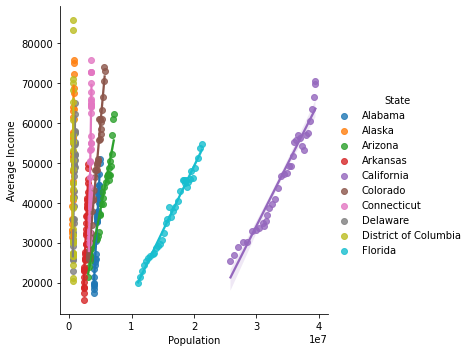

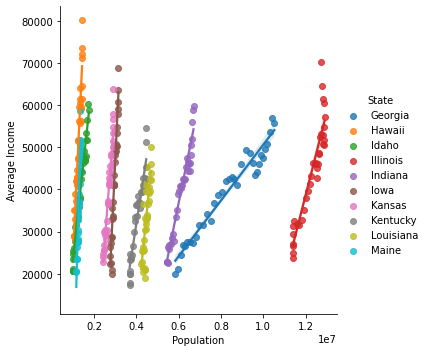

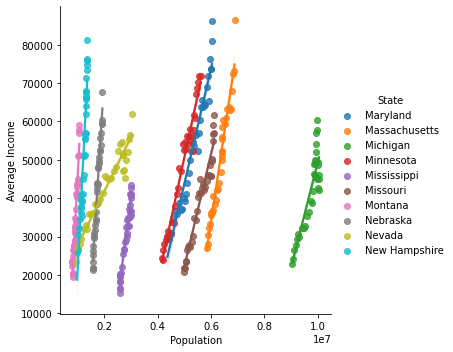

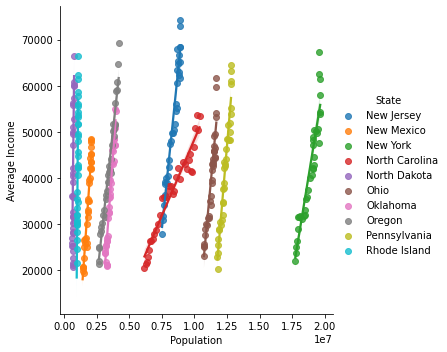

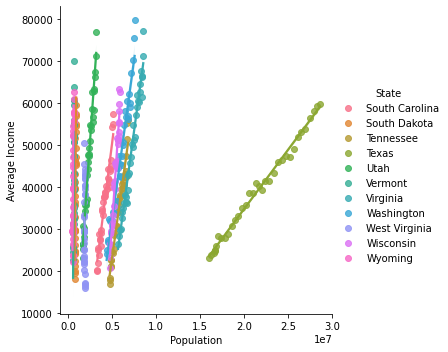

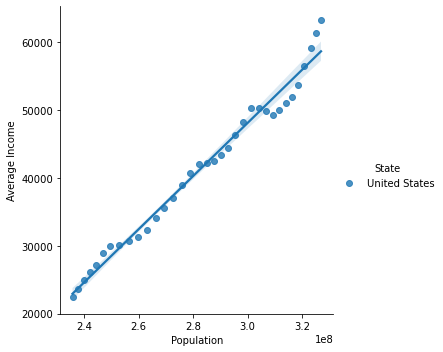

In [ ]:
#population vs income
for x in states_split:
    sns.lmplot(data = x, x = 'Population', y= 'Average Income', hue = 'State')
    plt.show()
sns.lmplot(data = us_split, x = 'Population', y= 'Average Income', hue = 'State')

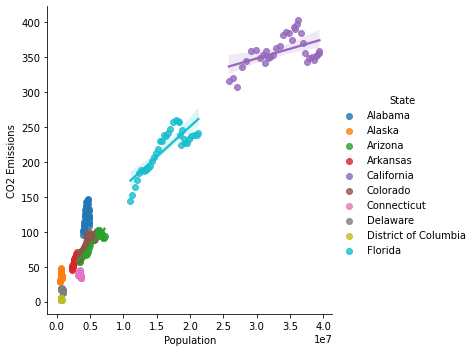

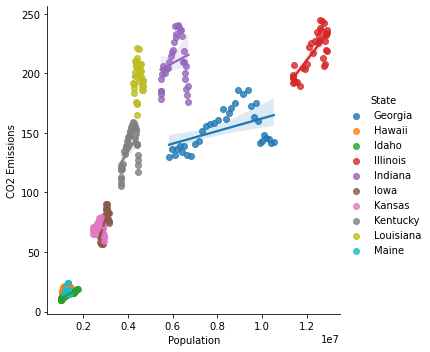

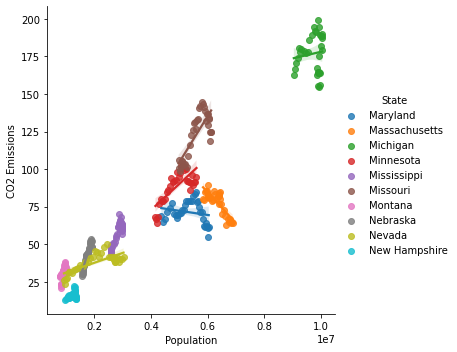

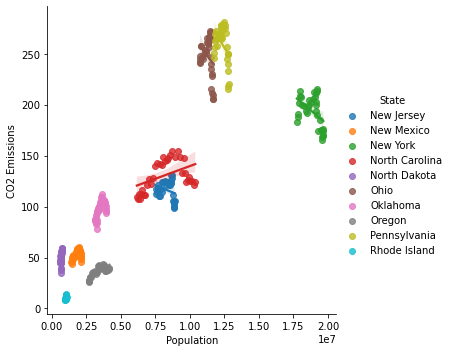

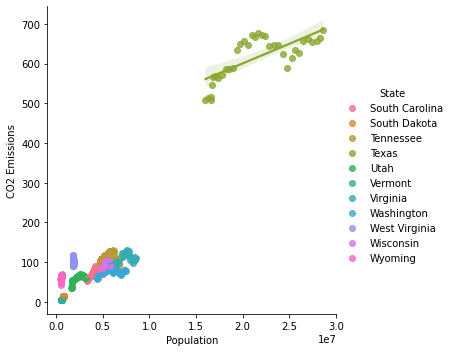

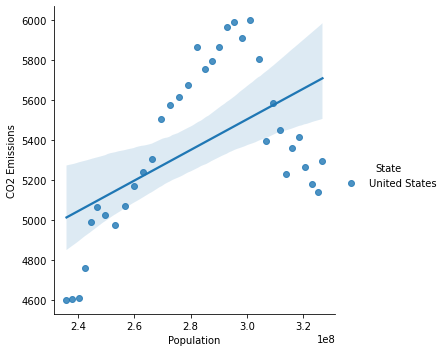

In [ ]:
#population vs co2 emissions
for x in states_split:
    sns.lmplot(data = x, x = 'Population', y= 'CO2 Emissions', hue = 'State')
    plt.show()
sns.lmplot(data = us_split, x = 'Population', y= 'CO2 Emissions', hue = 'State')

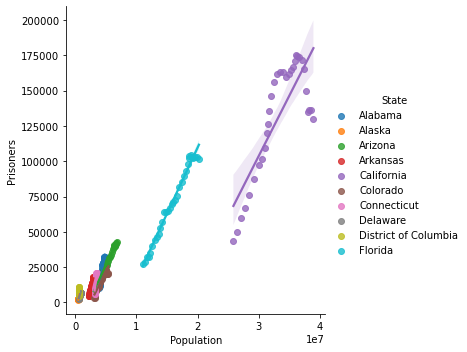

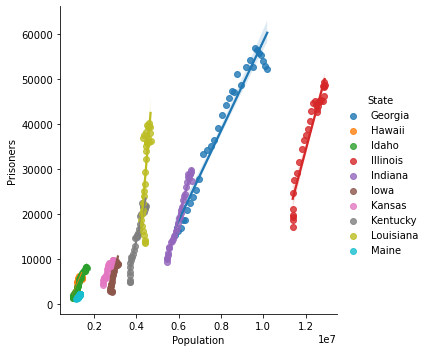

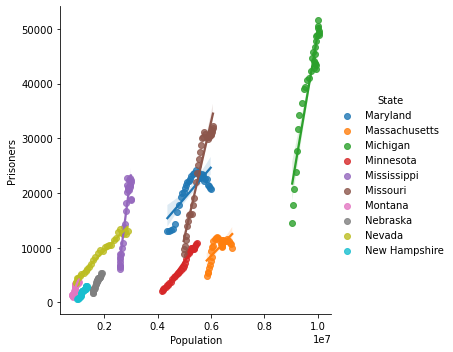

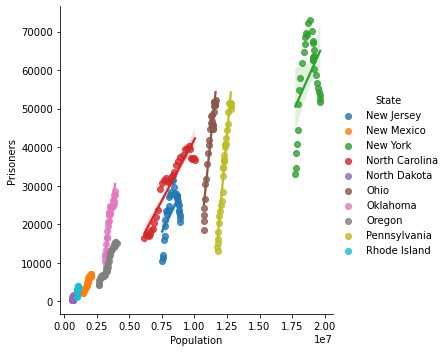

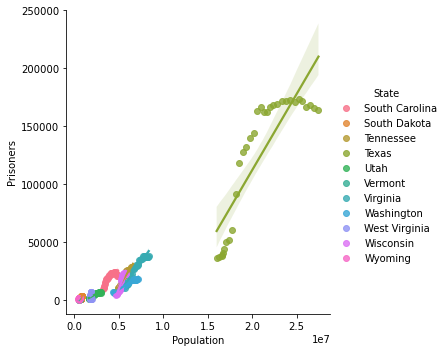

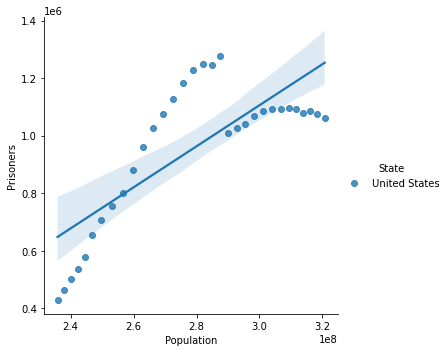

In [ ]:
#population vs prison population
for x in states_split:
    sns.lmplot(data = x, x = 'Population', y= 'Prisoners', hue = 'State')
    plt.show()
sns.lmplot(data = us_split, x = 'Population', y= 'Prisoners', hue = 'State')

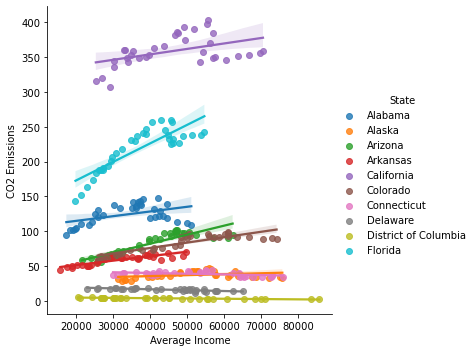

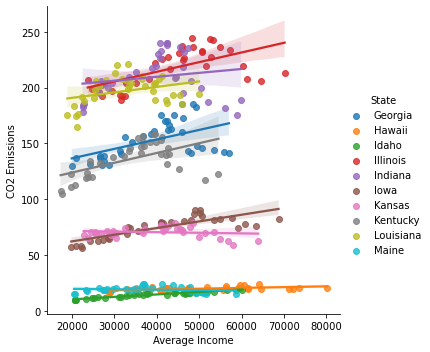

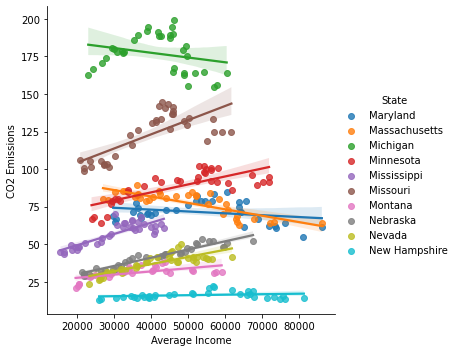

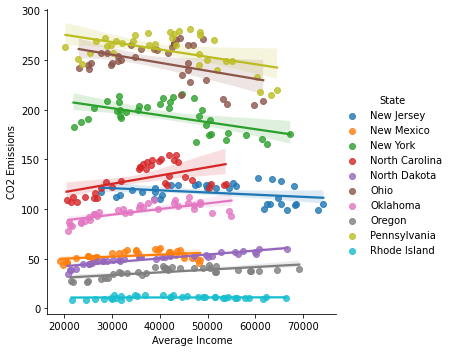

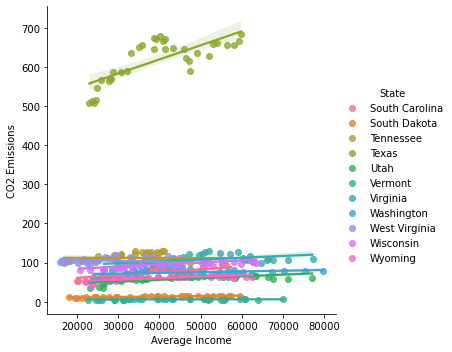

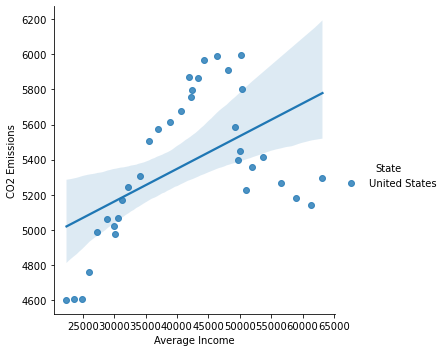

In [ ]:
#income vs co2 emissions
for x in states_split:
    sns.lmplot(data = x, x = 'Average Income', y= 'CO2 Emissions', hue = 'State')
    plt.show()
sns.lmplot(data = us_split, x = 'Average Income', y= 'CO2 Emissions', hue = 'State')

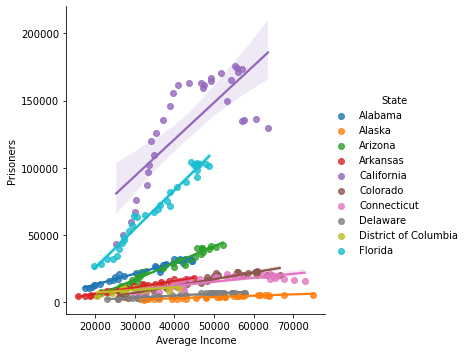

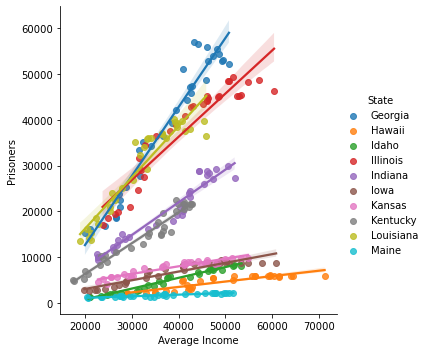

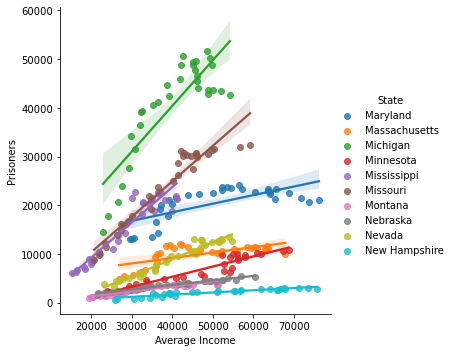

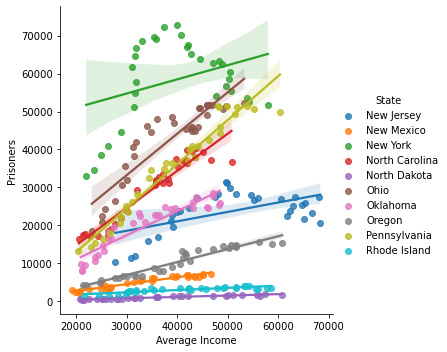

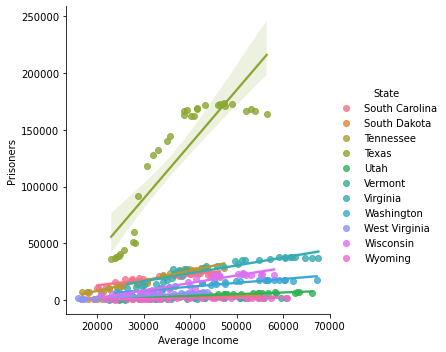

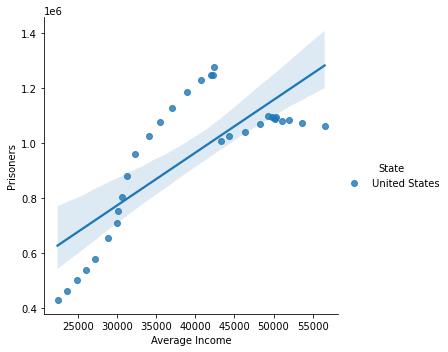

In [ ]:
#income vs prisoners
for x in states_split:
    sns.lmplot(data = x, x = 'Average Income', y= 'Prisoners', hue = 'State')
    plt.show()
sns.lmplot(data = us_split, x = 'Average Income', y= 'Prisoners', hue = 'State')

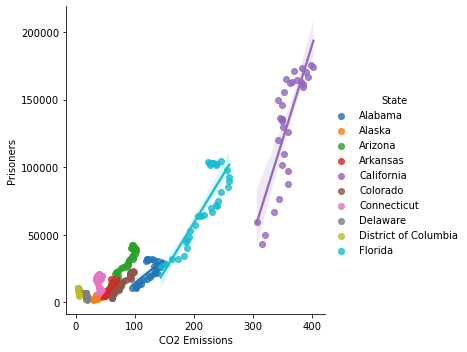

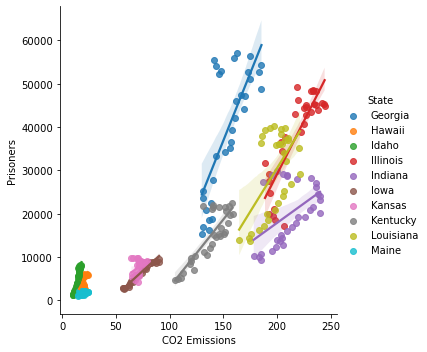

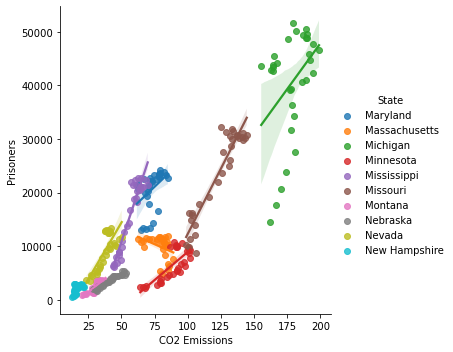

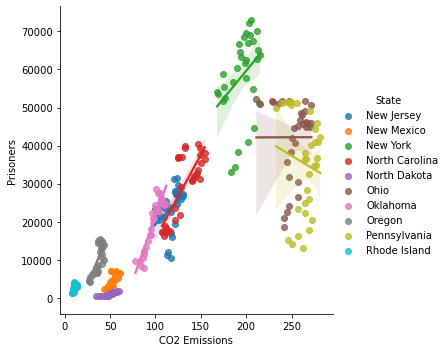

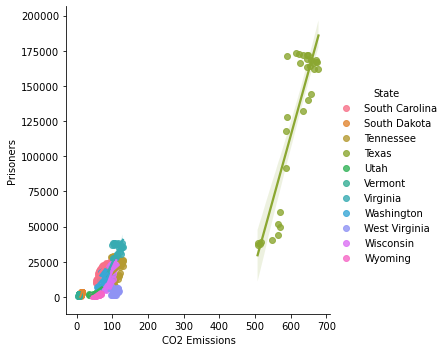

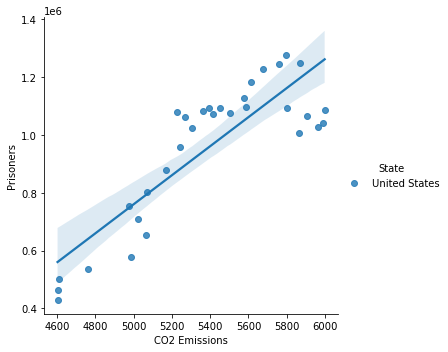

In [ ]:
#co2 vs prisoners
for x in states_split:
    sns.lmplot(data = x, x = 'CO2 Emissions', y= 'Prisoners', hue = 'State')
    plt.show()
sns.lmplot(data = us_split, x = 'CO2 Emissions', y= 'Prisoners', hue = 'State')

## Data Discussion:

The linear plots above could be improved in two ways: grouping states of similar magnitude, and exploring non-linear ways to display the data.

While splitting the graphs into 6 separate plots instead of one big one made the data visualizations immensely better, there is still some "smushing" of the scale because some larger values are being put on the same plot as smaller ones. For example, the plots that include data for Texas are hard to read because Texas' values are so much larger than the other states on that plot (this is because everything is bigger in Texas.)

Additionally, a linear regression does not well fit some of the data. For example, the plot of Population vs. CO2 Emissions shows a parabolic shape for nearly every state. We will further research the cause of this shape as the project progresses. It is possible that laws banning high CO2 emissions or incentives for low CO2 emissions were passed during some year between 1984-2018. It may be beneficial to do a logistic regression instead of a linear one.

Another interesting plot is the plot of Average Income vs. CO2 Emissions. For some states, this has an overall positive relationship, like Minnesota or Iowa, and for other states this has an overall negative relationship, like New York.

As we move forward, it may be beneficial to include the binary variable 'Party', with values Democrat or Republican, in our model.

## Difficulties faced during data collection:
Our biggest issues in terms of data collection were finding data that came from a reliable source as well as data that contained all 50 states by year. Many dataframes that we found contained data across the US for each year, but it was less common to find a state by state breakdown. The United States Census was a very helpful source in finding data per state over time. There were also difficulties in terms of gaps in the data. No dataset is perfect and while we tried to find data for every year in each state sometimes there was not a data set with every cell filled. As of now these gaps in the data are NaNs. In the future we will try to individually look up this data and properly cite it in order to fill in the gaps and create our own perfect dataset.

## Limitations:
There were a few limitations we discovered in our data. In the prision population data the years only go to 2015. The rest of our data goes to 2018. We are looking into finding 2016-2018 data so that all of the years match up. In the prison population data we also noticed that no data is recorded for prison population in Washington D.C. from 2001-2015. The prison population also did not come with a total US population column like our other dataframes came with, so we made our own within the spreadsheet.

## Discussion Notes
- How does missing data impact conclusion? MISSING DATA EXPLORATION SECTION HEADER

## Questions:

1. Is there a better way to display the mean/median summary statistics we computed, such as a bar graph or other plot?

2. Do you think we have enough and robust data to train a multivariable regression? Do you have any general tips for training a model?

3. Should we inlude Party as another variable to train the model on? Will including a binary variable amongst numerical variables introduce new challenges we should be wary of?

4. For addressing NaNs: is it ok to find the data for each cell separately online and manually enter them into the data frame?